### Load in data, and get bearings

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy.io import loadmat       # Import function to read data.
data = loadmat('EEG-1.mat')

In [3]:
whos

Variable   Type        Data/Info
--------------------------------
data       dict        n=6
loadmat    function    <function loadmat at 0x0000018F7F4D3920>
np         module      <module 'numpy' from 'c:\<...>ges\\numpy\\__init__.py'>
plt        module      <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>


In [4]:
data.keys() #EEGa (electrode 1), EEGb (electrode 2), t (time)

dict_keys(['__header__', '__version__', '__globals__', 'EEGa', 'EEGb', 't'])

In [5]:
EEGa = data['EEGa']
EEGb = data['EEGb']
t    = data['t'][0]

In [6]:
# What are the dimensions of the data, EEGa and t?

print('Shape of EEGs', np.shape(EEGa)) #(1000 rows, 500 columns)
print('Shape of EEGb', np.shape(EEGb)) #(1000, 500)
print('Shape of t', np.shape(t)) #(500,)

Shape of EEGs (1000, 500)
Shape of EEGb (1000, 500)
Shape of t (500,)


In [7]:
# Define variables to hold number of trials, and number of samples.
ntrials  = np.shape(EEGa)[0]
print('Number of trials', ntrials)

nsamples = np.shape(EEGa)[1] #number of time points
print('Number of samples', nsamples)

Number of trials 1000
Number of samples 500


### Visual inspection of trials 

In [8]:
# Option 1. Print data from trial 1.
print(EEGa[0,:])

[-1.85909632e-01  4.49876010e-01  1.06070801e+00 -4.71265246e-01
  1.68669327e+00  9.38221338e-01  2.21207038e-01  4.05491276e-01
  8.78879665e-01  5.23697825e-01 -2.35240678e+00 -9.24345879e-01
  7.66671797e-01 -4.64254999e-01  6.25953180e-02  1.51917029e+00
 -7.76400815e-01  8.14988739e-01 -1.58137285e-01 -6.17402518e-01
  2.07506393e-01  3.59430871e-01 -1.21455008e+00 -6.16715452e-01
 -4.81362032e-02  3.17982689e-01 -2.77459585e-01  4.14839815e-02
 -1.52257779e+00  1.31993666e+00  1.46836023e+00  1.84666100e+00
  5.23163980e-02  2.05515379e-01  2.27994679e-01 -1.34063464e+00
  5.61451651e-01  1.20391968e+00  1.06398658e+00  4.38748238e-01
  1.64443736e+00 -1.54713823e+00  6.41177787e-01 -1.13319311e+00
  1.06869889e+00  3.88678297e-01 -1.86251056e+00 -1.14074604e+00
 -4.59323117e-01  7.46220184e-01  4.40752835e-01 -7.05129357e-01
 -1.85879610e-01 -4.52021194e-02 -7.74389189e-01  1.55051475e+00
  1.12600755e+00 -1.14703552e+00 -5.42577409e-02  8.27809465e-01
  8.56502531e-01 -1.14366

Text(0.5, 1.0, 'Trial 1 of EEGa')

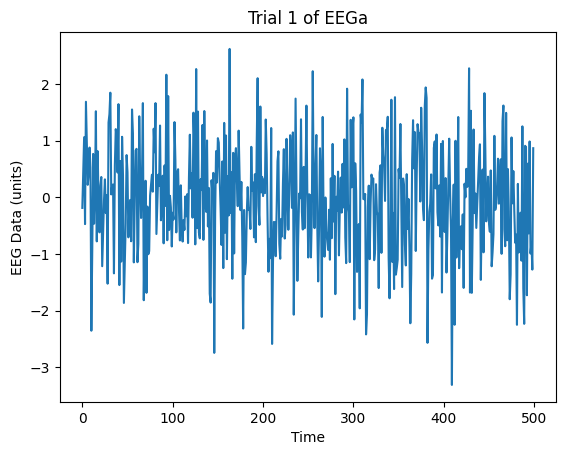

In [9]:
# Option 2. Plot data from trial 1.
plt.figure()
plt.plot(EEGa[0,:])
plt.ylabel('EEG Data (units)')
plt.xlabel('Time')
plt.title('Trial 1 of EEGa')

do we see an evoked response here? no. no impressions. that sure is data. looks noisy (maybe with outliers).

Text(0.5, 1.0, 'Variable T')

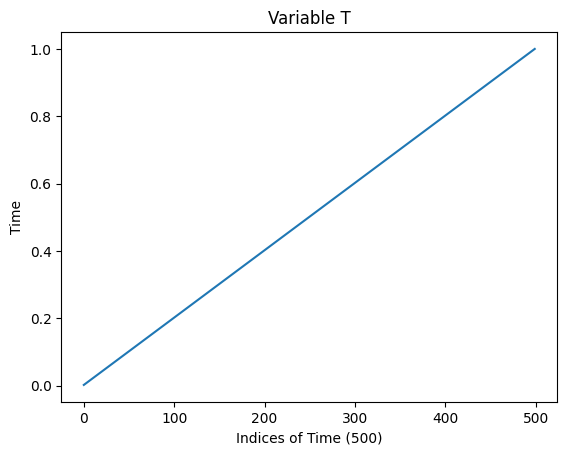

In [10]:
# Option 2. What about the x-axis?
plt.figure()
plt.plot(t)
plt.ylabel('Time')
plt.xlabel('Indices of Time (500)')
plt.title('Variable T')

In [11]:
# Determine the sampling interval
dt = t[1] - t[0]
print(dt)
dt = t[11] - t[10]
print(dt)

0.002
0.0020000000000000018


Time between units is 0.002 seconds.

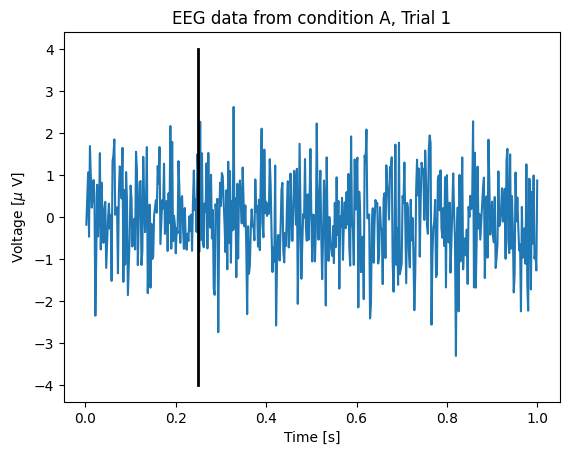

In [12]:
plt.clf()
plt.plot(t, EEGa[0,:])                     # Plot condition A, trial 1 data vs t.
plt.xlabel('Time [s]')                   # Label the x-axis as time.
plt.ylabel('Voltage [$\mu$ V]')          # Label the y-axis as voltage.
plt.title('EEG data from condition A, Trial 1')  # Add a title

# Add a vertical line to indicate the stimulus time
plt.plot([0.25, 0.25], [-4,4], 'k', lw=2)

In [13]:
# Plot condition A vs condition B for the 1st trial.
???

Object `?` not found.


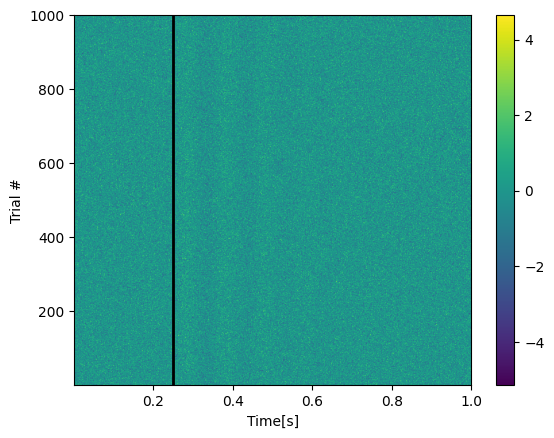

In [14]:
# Make an image of the data...

plt.figure()
plt.imshow(EEGa,                                   # Image the data from condition A.
           #cmap='BuPu',                            # ... set the colormap (optional)
           extent=[t[0], t[-1], 1, ntrials],       # ... set axis limits (t[-1] represents the last element of t)
           aspect='auto',                          # ... set aspect ratio 
           origin='lower')                         # ... put origin in lower left corner
plt.xlabel('Time[s]')                              # Label the axes
plt.ylabel('Trial #')
plt.colorbar()                                     # Show voltage to color mapping
plt.vlines(0.25, 1, 1000, 'k', lw=2)               # Indicate stimulus onset with line

VIsual inspection: suggests an ERP? Faint wave from after stim until 0.6 seconds

### Plotting the ERP <a id="plotting-the-erp"></a>

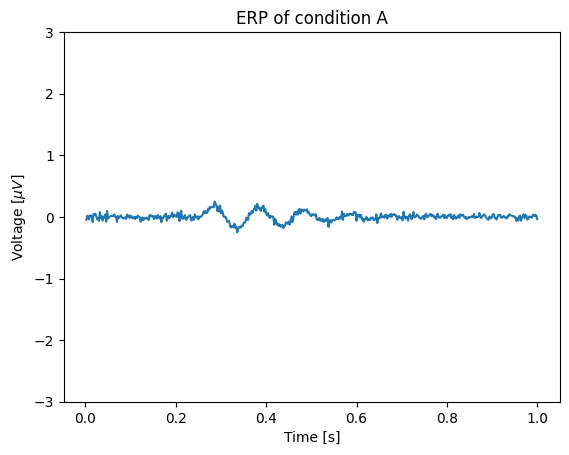

In [15]:
# Plot the ERP for condition A ...

ERPa = np.mean(EEGa,0)

plt.figure()
plt.plot(t, ERPa)
plt.xlabel('Time [s]')           # Label the axes
plt.ylabel('Voltage [$\mu V$]')
plt.title('ERP of condition A')  # ... provide a title
plt.ylim([-3, 3])   #Why this scale? Because it looks like the range we observed within the above graph 
plt.show()                       # ... and show the plot

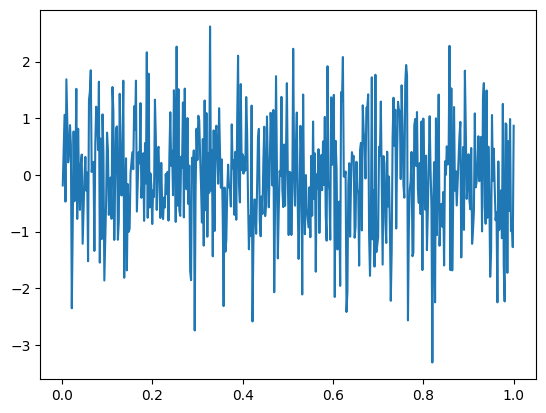

In [16]:
plt.figure()
plt.plot(t, EEGa[0])

### Confidence Intervals for the ERP (Method 1) <a id="cis-m1"></a>

In [17]:
mn = np.mean(EEGa,0)   #averaging across all rows   # Compute the mean across trials (the ERP)

In [18]:
sd = np.std(EEGa,0)
print(sd[0])    # Compute the std across trials

0.9944817496787421


In [19]:
sdmn = sd/np.sqrt(ntrials)# Compute the std of the mean

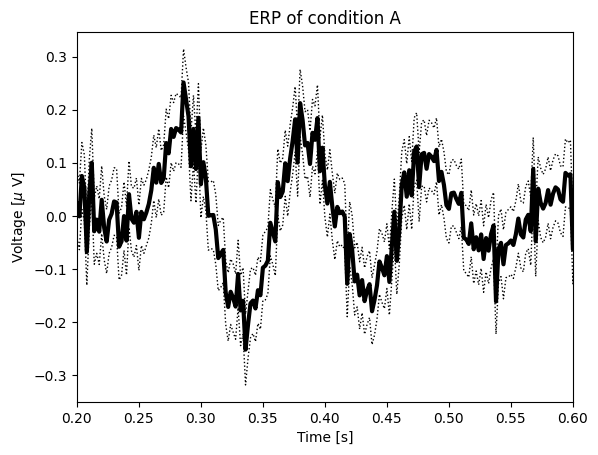

In [20]:
plt.plot(t, mn, 'k', lw=3)              # Plot the ERP of condition A
plt.plot(t, mn + 2 * sdmn, 'k:', lw=1)  # ... and include the upper CI
plt.plot(t, mn - 2 * sdmn, 'k:', lw=1)  # ... and the lower CI
plt.xlabel('Time [s]')                     # Label the axes
plt.ylabel('Voltage [$\mu$ V]')
plt.title('ERP of condition A')            # ... provide a useful title
plt.xlim([0.2,0.6])
plt.show()

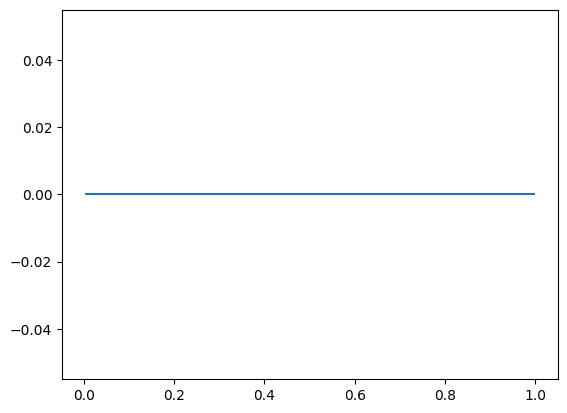

In [21]:
plt.hlines(0, t[0], t[-1]);